In [29]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
plt.grid(True)
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
rcParams['figure.max_open_warning'] = False
%load_ext autoreload
%autoreload 2

from redbaron import redbaron
redbaron.ipython_behavior = False

import numpy as np
from scipy import signal
from pyha import common
from pyha.common.util import plot_freqz
from examples.complex_fir import ComplexFIR
from pyha import simulate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Design filter

<IPython.core.display.Javascript object>


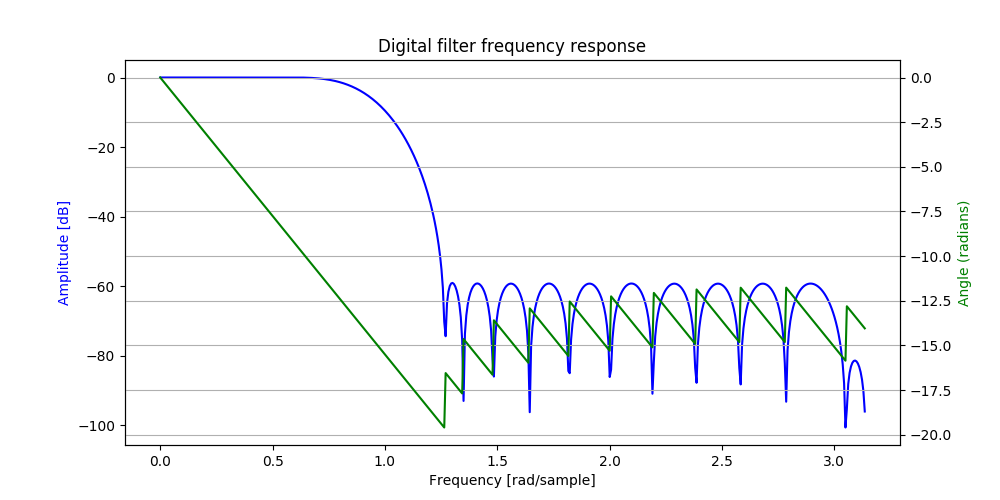

In [12]:
taps = signal.remez(32, [0, 0.1, 0.2, 0.5], [1, 0])
plot_freqz(taps)

In [39]:
inp = [0.0 + 0.0j] * 512
inp[0] = 1.0 + 1.0j

dut = ComplexFIR(taps)
sims = simulate(dut, inp, simulations=['MODEL', 'PYHA'])

INFO:pyha.simulation.simulation_interface:Running MODEL simulation!
INFO:pyha.simulation.simulation_interface:Running PYHA simulation!
INFO:pyha.simulation.simulation_interface:Converting complex inputs to ComplexSfix(left=0, right=-17)
INFO:pyha.simulation.simulation_interface:Running RTL simulation!
INFO:pyha.simulation.simulation_interface:Converting complex inputs to ComplexSfix(left=0, right=-17)
INFO:pyha.simulation.vhdl_simulation:Running COCOTB & GHDL simulation....


/home/gaspar/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6841: RuntimeWarning: divide by zero encountered in log10
  Z = 20. * np.log10(spec)


<IPython.core.display.Javascript object>


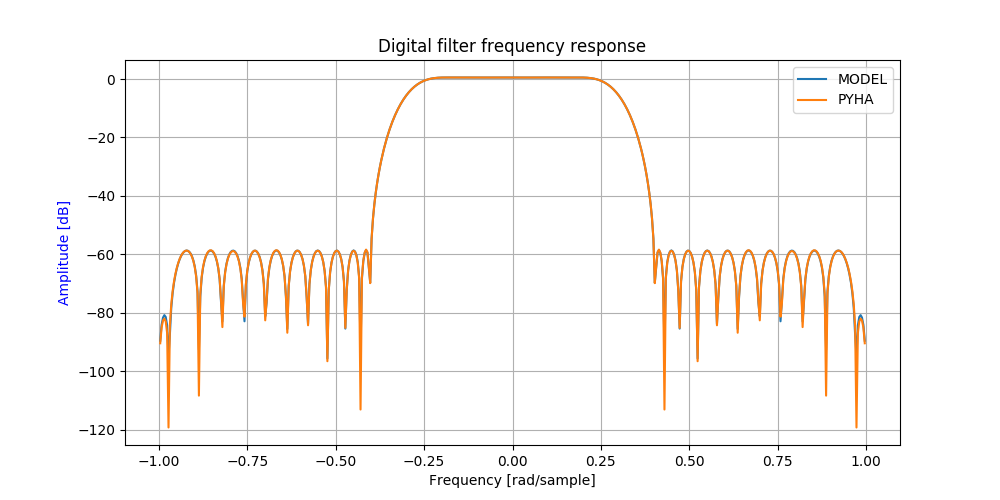

In [44]:
fig, ax1 = plt.subplots(1, 1)
plt.title('Digital filter frequency response')
ax1.magnitude_spectrum(np.array(sims['MODEL'])*(512-128), window=matplotlib.mlab.window_none, scale='dB', label='MODEL')
ax1.magnitude_spectrum(np.array(sims['PYHA'])*(512-128), window=matplotlib.mlab.window_none, scale='dB', label='PYHA')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
ax2.phase_spectrum(np.array(sims['MODEL']), window=matplotlib.mlab.window_none)
ax2.phase_spectrum(np.array(sims['PYHA']), window=matplotlib.mlab.window_none)
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.grid(True)
plt.legend()
plt.show()

/home/gaspar/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6841: RuntimeWarning: divide by zero encountered in log10
  Z = 20. * np.log10(spec)


<IPython.core.display.Javascript object>


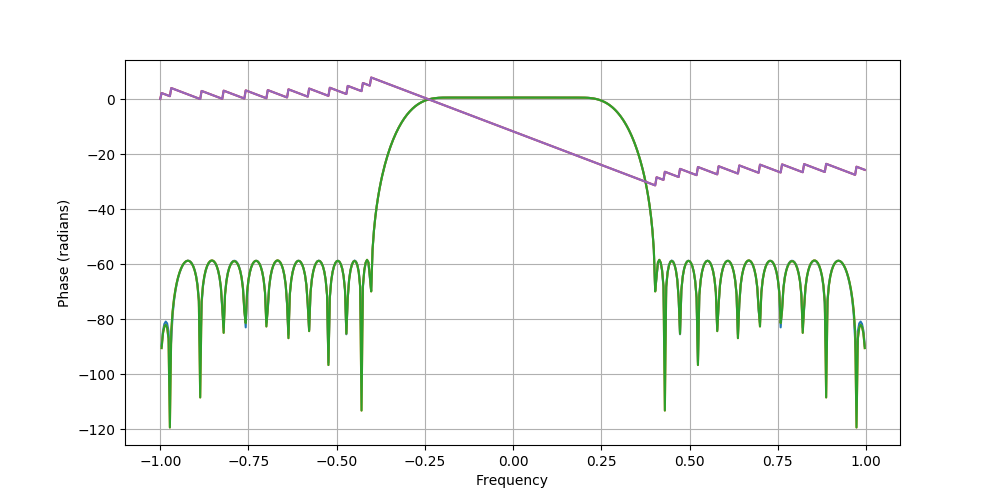

In [40]:
plt.magnitude_spectrum(np.array(sims['MODEL'])*(512-128), window=matplotlib.mlab.window_none, scale='dB')
plt.magnitude_spectrum(np.array(sims['PYHA'])*(512-128), window=matplotlib.mlab.window_none, scale='dB')

plt.phase_spectrum(np.array(sims['MODEL']), window=matplotlib.mlab.window_none)
plt.phase_spectrum(np.array(sims['PYHA']), window=matplotlib.mlab.window_none)
plt.grid(True)
# plt.show()

plt.show()

<IPython.core.display.Javascript object>


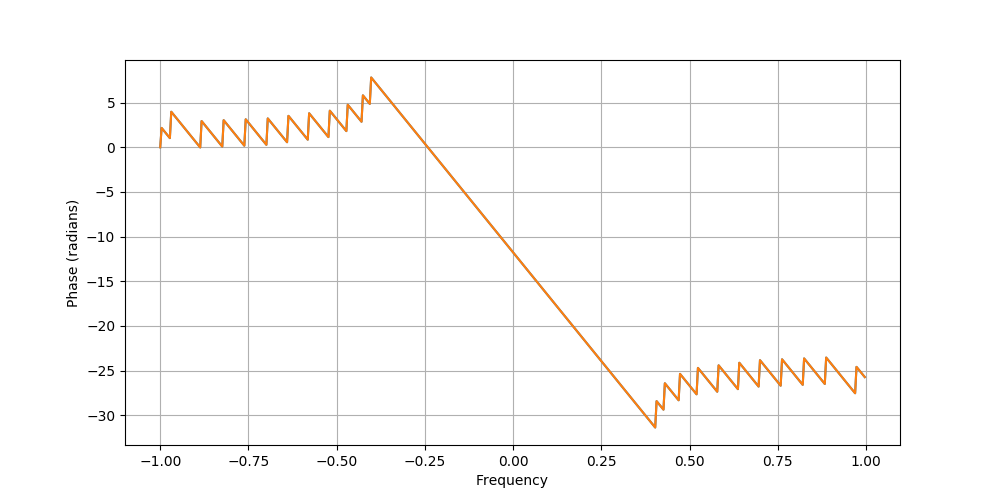

In [35]:
plt.phase_spectrum(np.array(sims['MODEL']), window=matplotlib.mlab.window_none)
plt.phase_spectrum(np.array(sims['PYHA']), window=matplotlib.mlab.window_none)
plt.grid(True)
plt.show()

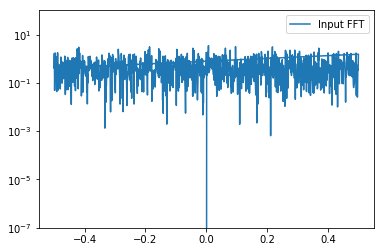

In [5]:
inp = np.random.uniform(-1, 1, 1024) + np.random.uniform(-1, 1, 1024)*1j
inp *= 0.9

plt.semilogy(*signal.periodogram(inp, return_onesided=False), label='Input FFT')

plt.ylim([1e-7, 1e2])
plt.legend()
plt.show()

INFO:pyha.simulation.simulation_interface:Running MODEL simulation!
INFO:pyha.simulation.simulation_interface:Running PYHA simulation!
INFO:pyha.simulation.simulation_interface:Converting complex inputs to ComplexSfix(left=0, right=-17)


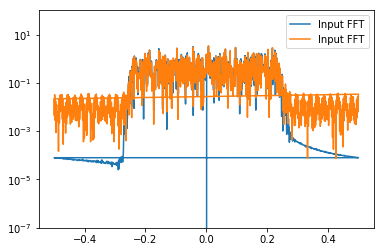

In [6]:
from examples.complex_fir import ComplexFIR
from pyha import simulate

dut = ComplexFIR(taps)

sims = simulate(dut, inp, simulations=['MODEL', 'PYHA'])

plt.semilogy(*signal.periodogram(sims['MODEL'], return_onesided=False), label='Input FFT')
plt.semilogy(*signal.periodogram(sims['PYHA'], return_onesided=False), label='Input FFT')
plt.ylim([1e-7, 1e2])
plt.legend()
plt.show()


In [9]:
print(sims)

{'MODEL': [(-0.00011769730895897037+5.3224434930976865e-05j), (-0.00027275011938758607+0.00030874422635387977j), (-0.0002848795457908661+0.0002242177761635469j), (-0.000416874452176603-0.00044712329451176736j), (0.0002712479862432841-0.0008210341392298915j), (0.0013078930128437166-3.564383931055641e-05j), (0.0002492427516684435+0.001111045004296245j), (-0.0011719702207389012+0.0005704985464132704j), (0.0004560243902394967-0.0012935915263163017j), (0.0019384828859524022-0.0005561973337619541j), (-0.001145720248842145+0.002668471965275427j), (-0.003556357871795338+0.0011236979626499893j), (0.001695735861298081-0.00379405801581952j), (0.005728878297515418-0.002041150891028484j), (-0.001786177503558659+0.004739833260446786j), (-0.007878227395630683+0.002870153440651721j), (0.0024566948270992885-0.007178365965455521j), (0.011297725683081518-0.004794691659283852j), (-0.0033445946566278135+0.009702401580756513j), (-0.015613583067065092+0.0065898737262296584j), (0.004303942847125888-0.01378726

In [10]:
from pyha import sims_close

assert sims_close(sims)

INFO:pyha.simulation.simulation_interface:MODEL OK!
ERROR:pyha.conversion.python_types_vhdl:PYHA(390) (0.0177459716796875+0.190521240234375j) != (0.017748707891577564+0.190490011317618j)
ERROR:pyha.conversion.python_types_vhdl:PYHA(563) (0.00554656982421875+0.976593017578125j) != (0.005544005938630747-1.0233875909357735j)
ERROR:pyha.conversion.python_types_vhdl:PYHA(607) (0.06279754638671875+0.9905548095703125j) != (0.06280769539973056-1.009466657326352j)
ERROR:pyha.conversion.python_types_vhdl:PYHA(908) (-0.97637939453125+0.0753173828125j) != (1.0236211488902998+0.0753079136888235j)
INFO:pyha.simulation.simulation_interface:PYHA FAILED!


AssertionError: 